## Virtual Environment for Individual-Based Modeling

This virtual environment is based on an Agent-Based Modeling system using some assumptions that are derived from previousobservations of waterbirds’ behaviors within some habitats in the tropics.

Created on March 31, 2019 by Ralph Florent <r.florent@jacobs-university.de>

In [4]:
# Virtual Environment for Individual-Based Modeling (IBM)
#
# Created on March 31, 2019
#
# Authors:
#   Ralph Florent <r.florent@jacobs-university.de>
#   Davi Tavares <davi.tavares@leibniz-zmt.de>
#   Agostino Merico <a.merico@jacobs-university.de>
#
# Main entry point for the application

# ==============================================================================
# START: Preamble
# ==============================================================================
%reset

# -*- coding: utf-8 -*-
import config
import constants as CONST
from core import initialize, observe, update
from helpers import plot_figure, make_gif

# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# reload external python modules
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


# ==============================================================================
# END: Preamble
# ==============================================================================

# ==============================================================================
# START: Application
# ==============================================================================

# main entry point for the application
# TODO: proper docs
def application():
    
    # pre-conditions
    config.init() # initialize internal config for the app
    time = 0 # define stopwatch for the process
    
     # process for t times
    print('=> START: Running simulation for waterbirds ABM')
    habitats, agents = initialize()
    observe(habitats, agents, time)
    
    for time in range(1, CONST.PROCESSING_TIME):
        agents = update(habitats, agents, time) # override agents when being updated
        observe(habitats, agents, time)
    
    print('=> END: Running simulation for waterbirds ABM')
    
    # post-conditions
    make_gif(CONST.SAMPLE_DIR, 'image.gif', CONST.STORE['images'])
    plot_figure()

    
# run application
application()

# ==============================================================================
# END: Application
# ==============================================================================

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
=> START: Running simulation for waterbirds ABM
==> :) All habitats have been created successfully!


KeyboardInterrupt: 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
=> START: Running simulation for waterbirds ABM


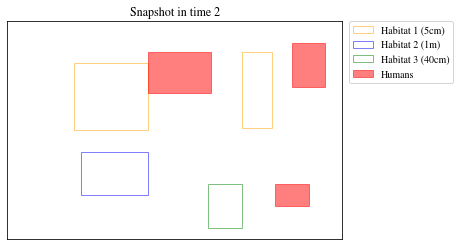

In [10]:
%reset

# -*- coding: utf-8 -*-
import config
import constants as C
from core import initialize, observe, update, create_patches
from helpers import plot_figure, make_gif
import matplotlib.pyplot as plt
import copy as cp
import os

# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# reload external python modules
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# pre-conditions
config.init() # initialize internal config for the app
time = 0 # define stopwatch for the process

 # process for t times
print('=> START: Running simulation for waterbirds ABM')
habitats = create_patches()
counter = 1

plt.cla()
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 3
plt.rcParams['legend.fontsize'] = 10
fig = plt.figure(1)
ax  = fig.add_subplot(111)
leg_handlers = []

# artists to display (with indicator)
for h in habitats:
    ax.add_patch( cp.copy(h.artist) )

# group by agent's type: { '5cm': [...agents] }
# grouped_agents = dict()
# for ag in agents:
#     if ag.type in grouped_agents:
#         grouped_agents[ag.type].append(ag)
#     else:
#         grouped_agents[ag.type] = [ag]

# for _type, g_ags in grouped_agents.items():
#     points = [ag.get_point() for ag in g_ags] # get all points: [(x1, y1), (x2, y2), ...]
#     x, y = list(zip(*points)) # unzip them: [(x1, x2, ...), (y1, y2, ...)]
#     c = C.get_agentp(_type, 'color')
#     l = C.get_agentp(_type, 'label')
#     leg_handle, = ax.plot(x, y, 'o', mec=c,mfc=c, label=l)
#     leg_handlers.append(leg_handle)

# legends for the plot through handlers
handler_artists = [h.artist for h in habitats[1:5]] # hard-coded order
handler_artists.extend(leg_handlers)

# additional settings for the plot
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.legend(handles=handler_artists, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.xlabel('Time ' + str(counter + 1))
plt.title('Snapshot in time ' + str(counter + 1), fontsize=12) # Identify which image is plotted

image_path = os.path.join(C.SAMPLE_DIR, str(counter + 1) + '.png')
plt.savefig(image_path, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close(fig)

# store image for final gif
# image = gm.imread(image_path)
# C.STORE['images'].append(image) # FIXME: read it when necessary

